In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import math
import sounddevice as sd
import random
import string
from Crypto.Cipher import AES

/tmp/ipykernel_524/3663445076.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('org_audio.wav')


Text(0.5, 1.0, 'Original Audio Plot')

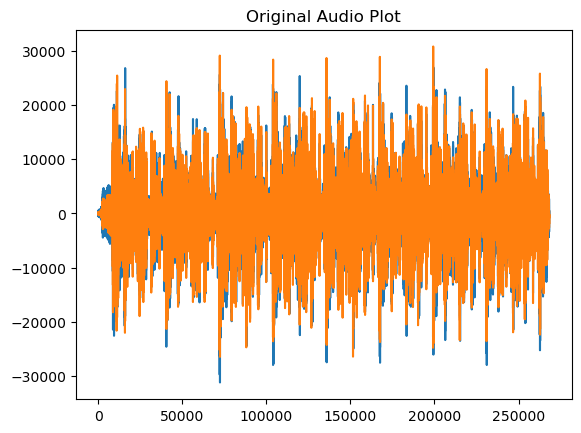

In [4]:
fs, data = wavfile.read('org_audio.wav')
plt.plot(data) # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [8]:
with open('org_audio.wav', 'rb') as fd:
 contents = fd.read()

In [11]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for _ in range(16))
AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for _ in range(16))

In [14]:
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  70Q2XPojny45Sjps
AES Initialization vector is  k8EZRiOzr2aZgNV8


In [17]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

In [19]:
with open('encrypted_audio_file.wav', 'wb') as fd:
 fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted


In [21]:
with open('encrypted_audio_file.wav', 'rb') as fd:
 contents = fd.read()

In [27]:
fs, data = wavfile.read('org_audio.wav')
k = np.asarray(data, dtype = np.int32)
#print(k)

/tmp/ipykernel_524/352403123.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('org_audio.wav')


In [29]:
p1 = int(input("Enter first prime number: "))
p2 = int(input("Enter second prime number: "))
p3 = int(input("Enter third prime number: "))
p4 = int(input("Enter forth prime number: "))
n = p1*p2*p3*p4
print("n = p1*p2*p3*p4 = ",n)
e = int(input("Enter a small, odd number, co-prime with n: "))
k = int(input("Enter value of k:"))
phi = (p1-1)*(p2-1)*(p3-1)*(p4-1)
print("phi = ",phi)
d = int((k*phi+1)/e)
print("d= ",d)
public_key = n,e
private_key = n,d
print("Public Key = ", public_key)
print("Private Key = ",private_key)

Enter first prime number:  5
Enter second prime number:  7
Enter third prime number:  11
Enter forth prime number:  19


n = p1*p2*p3*p4 =  7315


Enter a small, odd number, co-prime with n:  61
Enter value of k: 8


phi =  4320
d=  566
Public Key =  (7315, 61)
Private Key =  (7315, 566)


Text(0.5, 1.0, 'Encrypted Audio Plot')

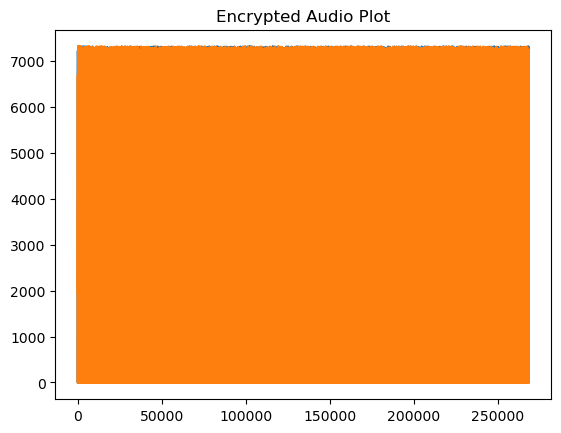

In [31]:
encrypted=[]
for i in data:
 encrypted.append((i**e)%n)
#encrypted = (data**e)%n
#print(encrypted)
plt.plot(encrypted)
plt.title("Encrypted Audio Plot")

In [33]:
with open('encrypted_audio_file.wav', 'wb') as fd:
 fd.write(encrypted_audio)

[[   0 3178]
 [6272 4178]
 [ 819 1331]
 ...
 [   0 1165]
 [   0    0]
 [2418    0]]


Text(0.5, 1.0, 'Decrypted Audio Plot')

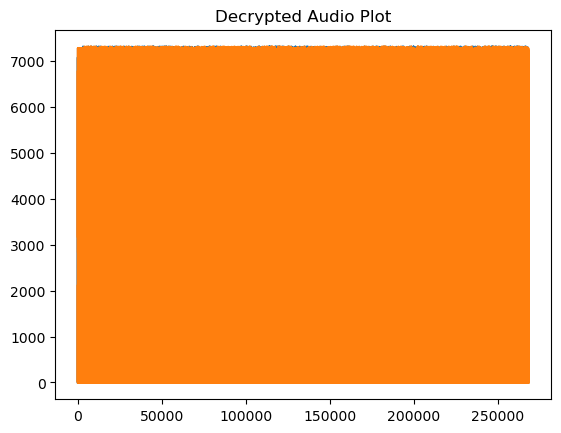

In [35]:
#RSA Decryption:XXX

MAX=100000

def multiply(x, res, res_size):
    carry = 0

    for i in range(res_size):
        prod = res[i] * x + carry
        res[i] = prod % 10
        carry = prod // 10
    while (carry):
        res[res_size] = carry % 10
        carry = carry // 10
        res_size+=1
    return res_size

# This function finds power of a number x
def power(x,n):
    if (n == 0) :
        print("1")
        return
    res=[0 for i in range(MAX)]
    res_size = 0
    temp = x
    # Initialize result
    while (temp != 0):
        res[res_size] = temp % 10;
        res_size+=1
        temp = temp // 10
    for i in range(2, n + 1):
        res_size = multiply(x, res, res_size)
    print(x , "^" , n , " = ",end="")
    for i in range(res_size - 1, -1, -1):
        print(res[i], end="")

decrypted = (data**d)%n
plt.plot(decrypted)
print(decrypted)
plt.title('Decrypted Audio Plot')

In [37]:
encrypted = np.asarray(encrypted,dtype=np.int16)
wavfile.write('decrypted.wav',fs,encrypted)

In [39]:
with open('encrypted_audio_file.wav', 'rb') as fd:
 contents = fd.read()

In [41]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [43]:
with open('decrypted_audio_file.wav', 'wb') as fd:
 fd.write(decrypted_audio)

/tmp/ipykernel_524/1329232441.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('decrypted_audio_file.wav')


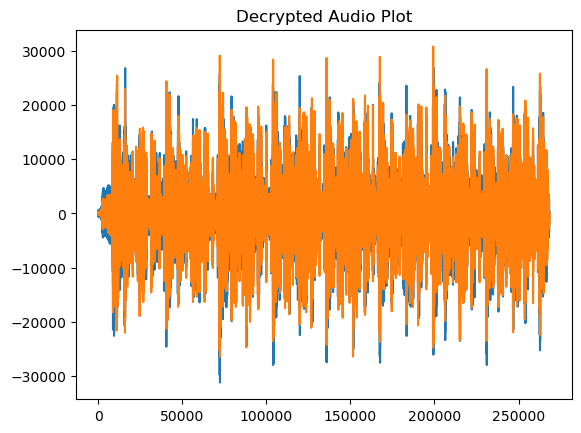

In [45]:
fs, data = wavfile.read('decrypted_audio_file.wav')
plt.plot(data) # fs = sampling frequency = 44.1kHz
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

In [ ]:
sd.play(data, fs)